# `1.5 Solar Panels ☀️`

## <span style="color:tomato"> Overview </span>

The SM111K06L solar panel provides power to the LunaSat by converting solar energy into electricity. The maximum power output of the solar panel is 146.9 mW. This means that the power usage of the LunaSat cannot exceed 146.9 mW at any time. We will explore putting the power usage of all of our configurations together in the final notebooks of the LPDM.

---

## <span style="color:tomato"> Configurations </span>

The solar panel is a passive component. Thus we do not have to worry about creating configurations for it.

---

## <span style="color:tomato"> Power Production as a Function of Time </span>

It's important to recognize that the day/night cycle on the Moon is very different from Earth's. One day and night on the Moon is 27 days, 7 hours, 43 minutes, and 11.5 seconds. This means that the LunaSats may be in sunlight for long periods of time and in darkness for long periods of time as well.

Unlike the Earth, the Moon does not have seasons, and it rotates on a minor tilt of 1.5º as opposed to the 23.4º angle the Earth rotates above. This means that while the time elapsed during day and night on the Moon's equator are roughly equivalent, the sun never rises or sets at the Moon's poles. 

We can express our vertical location on the Moon in terms of an angular coordinate called latitude. Latitude ranges between 90º and -90º, where 90º corresponds to the north pole, 0º corresponds to the equator, and -90º corresponds to the south pole. In the image below, each blue ring represents a latitudinal coordinate.


<img src="../modelFolder/images/800px-Moon-map.png" width="400" height="400">

Image taken from [here](en.wikipedia.org/wiki/Selenographic_coordinate_system)

Let's ignore the Moon's 1.5º tilt and assume that day and night at the equator are exactly half of the day/night cycle. This means that a lunar day is 328.3584 hours long and a lunar night is 328.3584 hours long. Lunar dawn will be exactly halfway between lunar midnight and lunar noon (164.1792 hours after lunar midnight), as will lunar dusk (492.5376 hours after lunar midnight).

The amount of time that the solar panels will be able to receive sunlight is limited to the time between lunar dawn and lunar dusk.

## <span style="color:tomato"> Power Production as Influenced by Landing Locations </span>

The amount of solar energy that can be converted to electricity by the LunaSat is dependent on both the time of day and the location on the Moon at which the LunaSats are located. 

Solar panels do not always produce the same amount of power. A solar panel's power output is dependent not only on its physical characteristics, but also on the angle of the solar panels relative to a source of light.

The amount of power (in mW) the LunaSat's solar panels can produce is given by

<span style="color:orange">$$ \cos(PSI) * SC * SA * CE * 1000 $$</span>

where <span style="color:orange">$PSI$</span> is the incidence angle of the lunar surface (and the LunaSat) with respect to the Sun as a function of time and latitude, <span style="color:orange">$SC$</span> is the solar constant, <span style="color:orange">$SA$</span> is the solar panel surface area, and <span style="color:orange">$CE$</span> is the solar panel cell efficiency. The solar constant is $1360$ in units of $\frac{W}{m^2}$. The surface area of the solar panels is $0.00072$ in units of $m^2$. The solar panel cell efficiency is 25%, or $0.25$. Calculating <span style="color:orange">$PSI$</span> is a bit complicated, but if you're interested in the math, it exists in the source code (SM111K.py). Right now, just know that <span style="color:orange">$PSI$</span> uses the time to find the longitudinal coordinate (our horizontal location on the Moon expressed as an angular coordinate ranging between -180º and 180º), as well as a given latitude to determine the angle of the Moon's surface, and thus the angle of the LunaSat's solar panels.

---

## <span style="color:tomato"> Power Output </span>

We can explore seeing how the available power provided by the solar panels changes depending on the latitude of the LunaSat and the time of day. Below we will produce multiple plots looking at the power output, with each plot corresponding to a latitude coordinate. You will be able to change the latitude as well as the number of elapsed hours since lunar midnight. Remember that one lunar day/night cycle is about 656.7167 Earth hours and that latitude is limited to between -90 and 90 degrees.

<span style="color:#18BF7D">For the following code, replace 'None' with appropriate values based on what you have learned above. Any lines without a 'None' should not be modified. </span>

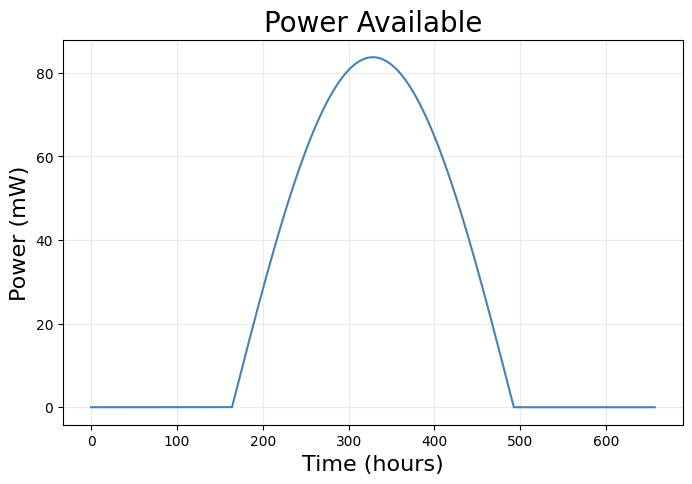

In [1]:
import micropip
await micropip.install("matplotlib")
import matplotlib.pyplot as plt
await micropip.install("numpy")
import numpy as np
from source.SM111K import SM111K

lat = None # Value between -90 and 90
hours_since_lunar_midnight = None # Value greater than 0. Recall that the lunar/day cycle is 656.7167 hours

solar_panel_model = SM111K(start_time_hrs=0, duration_hrs=hours_since_lunar_midnight, time_step_seconds=30, latitude=lat)
solar_panel_model.plot_power_available()

---

## <span style="color:tomato"> Putting It All Together </span>

While the landing location of the LunaSats has not been finalized, regions near the Moon's south pole in particular are being considered. 

<span style="color:#18BF7D">Revisit the cell above and explore latitudes between -75º and -90º.</span>

Another thing to consider is that if the LunaSats are deployed in a crater or another shadowy region, the sunlight they receive will be limited by the topology of the nearby environment. We cannot currently predict this, but it is a risk the LunaSats face.

<span style="color:#18BF7D">Run the following cell to store the model results.</span>

In [2]:
%store solar_panel_model

Stored 'solar_panel_model' (SM111K)


[Click here to continue to the combined PDM.](2.0%20Combined%20PDM.ipynb)